#1 Import Libraries and Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2
from sklearn.linear_model import LogisticRegression

# Load the cleaned data from the previous step
df = pd.read_csv('../data/cleaned_heart_disease.csv')
X = df.drop('target', axis=1)
y = df['target']

print("Cleaned data loaded successfully.")
X.head()

Cleaned data loaded successfully.


,age,trestbps,chol,thalach,oldpeak,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,...,exang_1.0,slope_2.0,slope_3.0,ca_0.6722408026755853,ca_1.0,ca_2.0,ca_3.0,thal_4.73421926910299,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,True,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,True,False,False,True,False,...,True,True,False,False,False,False,True,False,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,True,False,False,True,False,...,True,True,False,False,False,True,False,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#2 Method 1 - Feature Importance from Random Forest

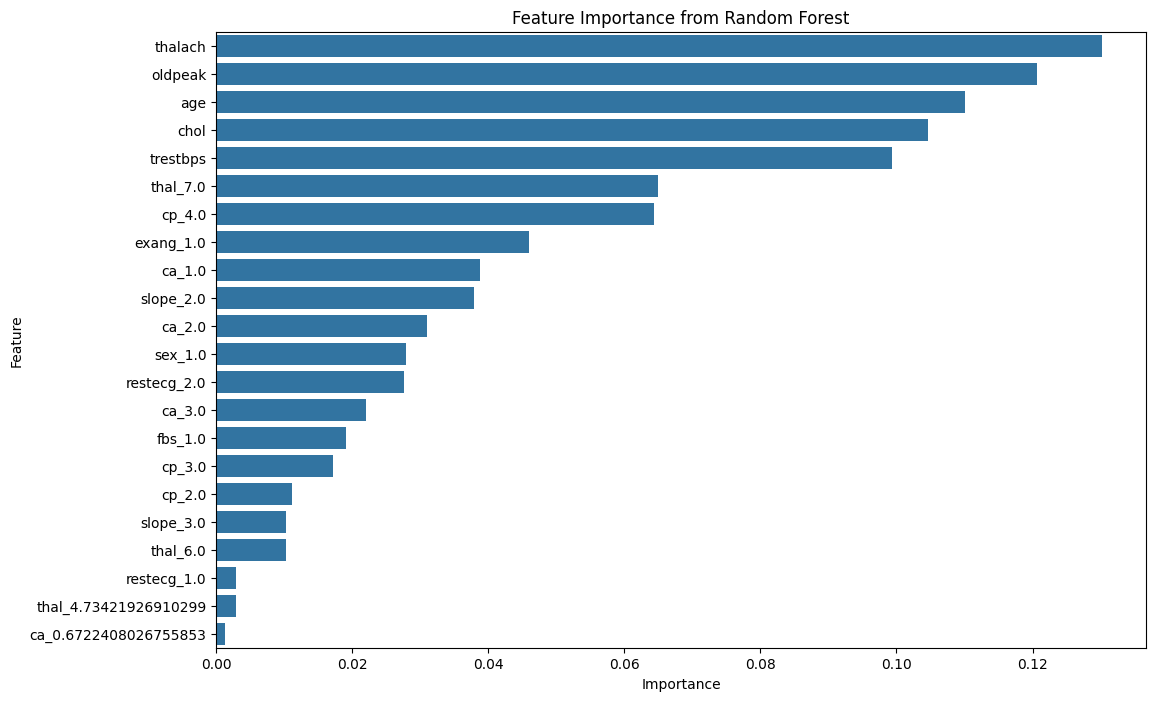

In [3]:
# Initialize and train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

#3 Method 2 - Recursive Feature Elimination (RFE)

In [4]:
# Initialize a model (Logistic Regression is a good choice for this)
logreg = LogisticRegression(max_iter=1000)

# Initialize RFE to select the top 10 features
rfe = RFE(estimator=logreg, n_features_to_select=10)
rfe.fit(X, y)

# Get the ranking of features (1 means selected)
rfe_ranking = pd.DataFrame({'Feature': X.columns, 'Rank': rfe.ranking_})
rfe_ranking = rfe_ranking.sort_values(by='Rank')

print("--- Top 10 Features from RFE ---")
print(rfe_ranking[rfe_ranking['Rank'] == 1])

--- Top 10 Features from RFE ---
        Feature  Rank
4       oldpeak     1
11  restecg_2.0     1
9       fbs_1.0     1
8        cp_4.0     1
13    slope_2.0     1
18       ca_3.0     1
17       ca_2.0     1
16       ca_1.0     1
20     thal_6.0     1
21     thal_7.0     1


#4 Conclusion & Saving the Final Dataset

In [5]:
# Select the top 12 features based on the Random Forest importance
final_features = feature_importance_df['Feature'].head(12).tolist()

# Create the final DataFrame with selected features and the target variable
final_df = df[final_features + ['target']]

# Save the new DataFrame to a CSV file for the next step (modeling)
output_path = '../data/final_feature_dataset.csv'
final_df.to_csv(output_path, index=False)

print("\nFinal dataset created with the following features:")
print(final_features)
print(f"\nDataset saved to: {output_path}")
final_df.head()


Final dataset created with the following features:
['thalach', 'oldpeak', 'age', 'chol', 'trestbps', 'thal_7.0', 'cp_4.0', 'exang_1.0', 'ca_1.0', 'slope_2.0', 'ca_2.0', 'sex_1.0']

Dataset saved to: ../data/final_feature_dataset.csv


,thalach,oldpeak,age,chol,trestbps,thal_7.0,cp_4.0,exang_1.0,ca_1.0,slope_2.0,ca_2.0,sex_1.0,target
0,0.017197,1.087338,0.948726,-0.264900,0.757525,False,False,False,False,False,False,True,0
1,-1.821905,0.397182,1.392002,0.760415,1.611220,False,True,True,False,True,False,True,2
2,-0.902354,1.346147,1.392002,-0.342283,-0.665300,True,True,True,False,True,True,True,1
3,1.637359,2.122573,-1.932564,0.063974,-0.096170,False,False,False,False,False,False,True,0
4,0.980537,0.310912,-1.489288,-0.825922,-0.096170,False,False,False,False,False,False,False,0
